# Bayesian Monthly Sensitivity Model

### Adapted for SimFarm2030

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import pystan
%matplotlib inline

In [75]:
# Compile model
sm=pystan.StanModel(file='stan/BMSM-simp.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e7839d65b913f1005fc3976af2843100 NOW.
C:\Users\Andrew\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Andrew\AppData\Local\Temp\tmpnzmde1be\stanfit4anon_model_e7839d65b913f1005fc3976af2843100_3516908443650320811.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [77]:
templists,rainlists,yieldlist =[],[],[]

for counter in range(1,7):
    templists.append(np.load('data/Temps'+str(counter)+'.npy'))
    
for counter in range(1,7):
    rainlists.append(np.load('data/Rain'+str(counter)+'.npy'))

for counter in range(1,7):
    yieldlist.append(np.load('data/Yield'+str(counter)+'.npy'))
    
rainlists = np.array(rainlists)
templists = np.array(templists)
yieldlist= np.array(yieldlist)

templists = templists.reshape(6,int(len(templists[0])/12),12)



rainlists = rainlists.reshape(6,int(len(rainlists[0])/12),12)

data={
    'n_regions':2,
    'n_years':8,
    'd_temp':templists[0:2],
    'd_yields':yieldlist[0:2],
}
            


In [78]:
fit=sm.sampling(data=data,chains=4,iter=1000,verbose=True,control={'max_treedepth': 14})

In [79]:
fit

Inference for Stan model: anon_model_e7839d65b913f1005fc3976af2843100.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
s_temp[1,1]          4.95    3.01  50.07 -95.56 -29.98   6.43  39.85 101.78    276   1.02
s_temp[2,1]         -0.77    4.09  70.61 -147.5 -48.39   1.69   46.3 136.22    298   1.02
s_temp[1,2]         -3.15    3.81  70.85 -135.7 -52.24  -3.21  46.62 133.78    346   1.01
s_temp[2,2]         -5.17    2.88  65.24 -142.5 -47.76  -3.58  38.07 118.44    515    1.0
s_temp[1,3]          1.35    3.45  52.06 -96.57 -33.81   0.66  35.61 106.29    227   1.01
s_temp[2,3]          4.19    2.47  46.44  -88.6 -26.38   4.94  36.85  92.07    354   1.01
s_temp[1,4]          2.02    4.66   65.8 -129.5 -42.91   3.25  47.42  125.5    199   1.03
s_temp[2,4]          4.51    3.86   70.8 -137.4 -41.72   7.16  54.19 138.78    336   1.01
s_t

In [80]:
# carry out some diagnostic checks on fit
import stan_utility
stan_utility.check_div(fit)
stan_utility.check_energy(fit)
stan_utility.check_treedepth(fit)

0.0 of 2000 iterations ended with a divergence (0.0%)
33 of 2000 iterations saturated the maximum tree depth of 10 (1.65%)
Run again with max_depth set to a larger value to avoid saturation


In [81]:
samples=fit.extract()

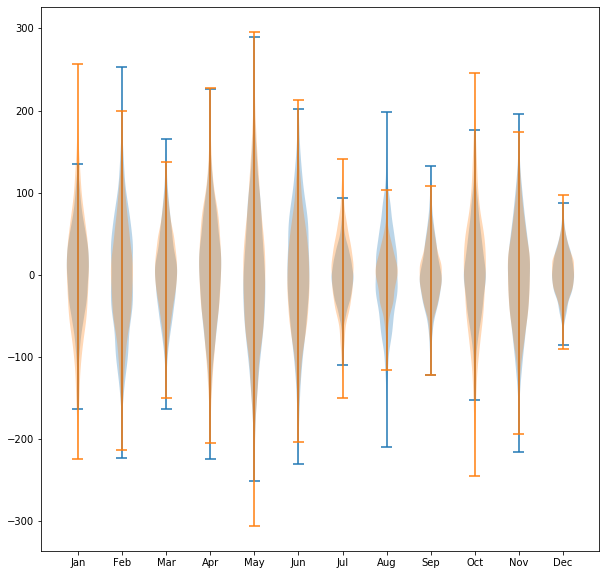

In [82]:
plt.figure(figsize=(10,10))
plt.violinplot(samples['s_temp'][:,0,:]);
plt.violinplot(samples['s_temp'][:,1,:]);
plt.xticks(range(1,13),maize_temp.columns[1:]);


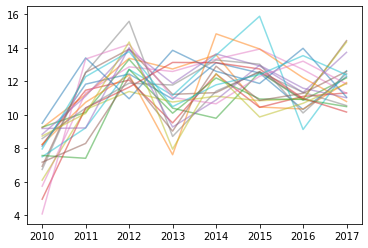

In [83]:
for s in range(0,2000,100):
    plt.plot(range(2010,2018),samples['d_yields_pred'][s,0,:].T,alpha=0.5)
    

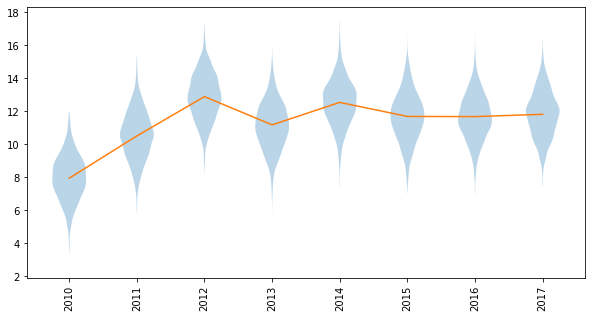

In [84]:
plt.figure(figsize=(10,5))
plt.violinplot(samples['d_yields_pred'][:,0,:],showextrema=False);
plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][0,:])



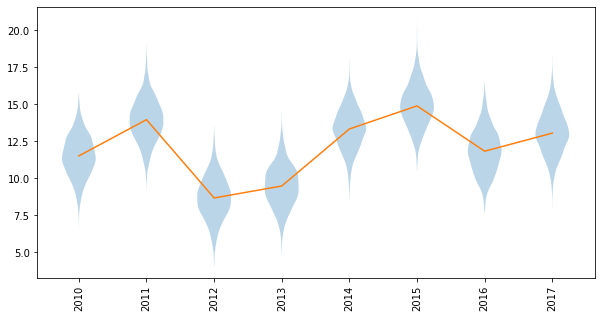

In [85]:
plt.figure(figsize=(10,5))
plt.violinplot(samples['d_yields_pred'][:,1,:],showextrema=False);
plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][1,:])



In [16]:
fit.data['d_yields'].shape

(2, 35)